In [1]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9]
variable = ['x']
First_population = 60
Best_choise_num = 5
Other_choise_num = 2
Iteration = 50
Mutation_rate = 0 #From 100%
Mutation_count = 0 #Per gen
Max_tree_depth = 2
copy_Mutation_rate = 10
copy_Mutation_count = 2
max_node = 2 ** Max_tree_depth
Label = "np.sin(x) + np.cos(2*x)"
Mutation_rate2 = 50

In [3]:
def function(x):
    return 2 * (x**2)  + 1


In [4]:
X_train = np.random.randint(1, 200, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train

array([  243,  9801,  5001, 51843, 23329, 10953,    33, 27849,  2451,
       12801,  2313,  7201, 29283, 23329, 12801,   201, 77619, 59859,
       52489,   393, 66979, 36993,  8979, 77619, 33283, 37539, 38643,
        4609, 16201, 35379, 73729,  1801,  3043, 76833,    19, 11553,
       29769, 57123, 49299, 29283, 19209,  6963, 76051,  2049, 12801,
        2049, 13123, 22051,   289, 26451, 14113,  3201, 69939,  1683,
         163, 62659, 22473, 17299,   339, 20809, 55113,    19, 63369,
       15489, 39763,  4051,   883,  7443, 59169,  4419,  5203,  2739,
        2451, 42633, 11251, 20001,  5409, 45603, 29769, 33801, 23763,
        4051,  5001,     3, 15843,  8979,  9249,  6729,   289, 17299,
       72963,   201, 53139, 41473, 51201, 58483, 22473, 28323,  2593,
       31251])

In [5]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0

In [7]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow(self.max_depth)

    def printTree (self , node = None):
        if (node == None):
            x = self.to_math_string(self.root)

        else:
            x = self.to_math_string(node)
        print (x)
        return x


    def grow (self ,max_depth,  depth = 0  ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child = random.choice(Values)
                else:
                    child = "x"
                temp_node = Node (operator=temp_op, children=[child])
                temp_node.isLeaf = True
                return temp_node
            else :
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child1 = random.choice(Values)
                else:
                    child1 = "x"

                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child2 = random.choice(Values)
                else:
                    child2 = "x"
                temp_node = Node (operator= temp_op , children=[child1,child2])
                temp_node.isLeaf = True
                return temp_node

        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow (max_depth, depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow (max_depth , depth= depth + 1 )
                right_node = self.grow (max_depth, depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node

    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"


    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    if (node.children[0] == "x"):
                        node.value = self.SinCosOp (node , val)

                    else :
                        node.value = self.SinCosOp (node , node.children[0])
                    # return node.value
                else :
                    if (node.children[0] == "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , val , val)
                    elif (node.children[0] == "x" and node.children[1] != "x"):
                        node.value = self.OtherOp (node , val , node.children[1])
                    elif (node.children[0] != "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , node.children[0], val)
                    else:
                        node.value = self.OtherOp (node , node.children[0] , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value



    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)

    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return
        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 1000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes

    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):


        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node

    def depth_calculator (self , node , depth = 1 , max_depth = 1):
        if (node.isLeaf == True):
            if (depth > max_depth):
                return depth
            else:
                return max_depth
        else:
            for child in node.children :
                max_depth = self.depth_calculator (child , depth+1 , max_depth)
            return max_depth

In [11]:
    def Mutation (arr):
       for tree in arr :
        ran = random.randint (1 , 100)
        if (ran <= Mutation_rate2):
            # tree.printTree()
            nodes = tree.TreeToList()
            randNode  = random.choice(nodes)
            # tree.printTree(randNode)
            depth = tree.depth_calculator(randNode)
            # print (depth)
            tempNode = copy.deepcopy(tree.grow(depth-1))
            depth1 = tree.depth_calculator(tempNode)
            # print ( depth1)
            # tree.printTree(tempNode)
            tree.ReplaceNode (randNode , tempNode)
            # tree.printTree()
            # print("--------------")

In [12]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree

In [13]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

((x / x) + sin(x))
cos((x + x))
cos((sin(x) + (0 ^ x)))
((2 / 7) / cos((1 / x)))
((x / 0) - (2 / x))
cos((0 ^ 0))
((1 / x) ^ (8 / 5))
(1 + x)
(sin(x) ^ (2 * 5))
((sin(3) ^ cos(x)) * (cos(5) * sin(8)))
(x ^ 7)
(sin(1) ^ (x + 9))
(((2 / 9) + sin(x)) / sin(x))
(x / x)
(sin(0) - (sin(x) * cos(0)))
(x - 2)
(cos(5) - (x * 1))
((sin(0) - (2 * x)) ^ sin((x * 7)))
sin((cos(4) ^ (4 * 3)))
(x ^ x)
(((8 ^ x) / (3 + 5)) - (8 / 8))
(9 * 0)
((x / 2) ^ (2 ^ x))
((0 + x) ^ (x * x))
(sin(x) - (7 - 8))
(x ^ 0)
((x / 5) * (cos(x) - sin(x)))
cos(cos((5 * 9)))
sin((5 + 1))
(5 ^ x)
((x / 2) * (x + x))
(sin((4 - 1)) / cos((x / x)))
sin((x / 4))
sin(x)
(1 * x)
cos((x + 1))
(sin(x) + ((1 - x) + sin(x)))
(sin(cos(x)) - ((x / 7) + cos(1)))
((x - 1) + (1 * x))
(((x - 7) ^ sin(1)) / cos((1 / x)))
((x - 8) ^ sin((3 / x)))
sin(((x + 5) * (x * x)))
(sin((9 * 5)) / ((x / 6) / (x * 0)))
(x * 1)
(cos(6) - (1 ^ x))
((5 / x) + (3 ^ x))
(((7 ^ x) + cos(7)) + ((7 + x) / sin(x)))
((6 * 1) - (0 + x))
cos((4 + x))
(sin(6) - (5 

In [14]:
avg = []
best = []
n = 0
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]

    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])


    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, Other_choise_num)
    for element in random_elements :
         bestTrees.append(element)

    # Mutation

    if (len(avg) > 2):
        if avg[-1] == 0 :
            break
        tempDiff = abs(avg[-2] - avg[-1])
        # print ("temp diff : " , tempDiff)
        if (tempDiff == 0):
            tempScale = 200
        else:
            tempScale = avg[-1] / tempDiff
        # if ( avg[-1]<1):
        #     n=0
        #     Mutation_rate = 0
        #     Mutation_count = 0
        if (tempScale > 100):
            # print (avg[-1])
            # print ("&&&&&&&")
            # print (" the n is :" , n)
            n +=1
            Mutation_rate = copy_Mutation_rate * n
            Mutation_count = copy_Mutation_count * n
        else :
            n=0
            Mutation_rate = copy_Mutation_rate
            Mutation_count = copy_Mutation_count


    # tempRate = random.randint(1,100)
    # if (tempRate <= Mutation_rate):
    #     for j in range (Mutation_count):
    #         tempTree = Create_tree()
    #         bestTrees.append(tempTree)
    #         # print ("!!!!!!!!")
    #         # print (i)
    #         # tempTree.printTree()



    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):
            flag = True

            for i in range (10):
                temp1 = copy.deepcopy(bestTrees[j])
                temp2 = copy.deepcopy(bestTrees[k])

                nodes1= temp1.TreeToList()
                nodes2 = temp2.TreeToList()

                # print (str(len(nodes1)) + " || " + str(len(nodes2)))

                select1 = random.choice (nodes1)
                select2 = random.choice (nodes2)

                # print ("Before change")
                # temp1.printTree()
                # temp2.printTree()

                # print ("Selected Nodes:")
                # temp1.printTree(select1)
                # temp2.printTree(select2)

                temp1.ReplaceNode (select1 , select2)
                temp2.ReplaceNode (select2 , select1)

                list1= temp1.TreeToList()
                list2= temp2.TreeToList()

                if (len(list1) <= max_node and len(list2) <= max_node):
                    break
                # print ("After change")
                # temp1.printTree()
                # temp2.printTree()
                # print (str(len(list1)) + " || " + str(len(list2)))

            # print ("---------------------")


            treeList.append(temp1)
            treeList.append(temp2)

                # print ("Child created!")
                # print ("-----------------------------------------------------------")

    tempRate = random.randint(1,100)
    if (tempRate <= Mutation_rate):
        # for j in range (Mutation_count):
            # tempTree = Create_tree()
            # bestTrees.append(tempTree)
            # # print ("!!!!!!!!")
            # # print (i)
            # # tempTree.printTree()
        Mutation (treeList)


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    temp_avg = round((sum(lowest_five) / len(lowest_five)) , 2)
    avg.append(temp_avg)
    best.append (sorted_list[0])
    print (temp_avg)
    mseTree = np.array(mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]


for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

print ("------------------------------------------")

print ("Best MSE: " , sorted_list[0])
print ("Best Tree: ")
treeList[bestTreesIndex[0]].printTree()

746194782.4
718243704.65
716386141.96
716386141.96
715873068.95
714333849.93
713820776.92
713820776.92
713761794.26
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
714214847.05
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
713672023.32
((1 * x) * (x + x))
((1 * x) * (x + x))
((1 * x) * (x + x))
((1 * x) * (x + x))
((1 * x) * (x + x))
------------------------------------------
Best MSE:  713672023.32
Best Tree: 
((1 * x) * (x + x))


'((1 * x) * (x + x))'

((1 * x) * (x + x))


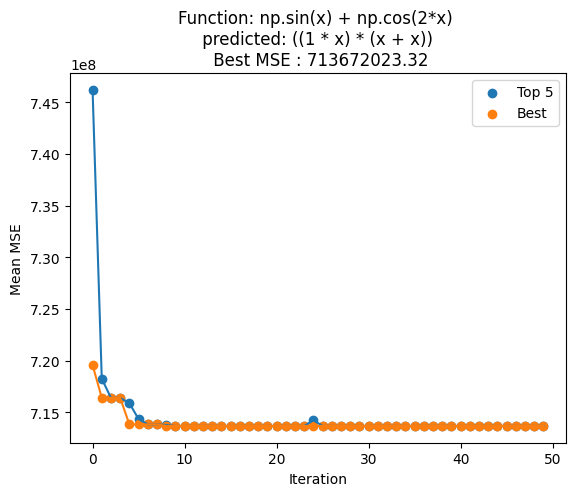

In [15]:
fig, ax = plt.subplots()

ax.scatter(range(len(avg)), avg)
ax.scatter(range(len(best)) , best)

plt.legend(["Top 5", "Best"])



ax.plot(range(len(avg)), avg, '-')
ax.plot(range(len(best)), best, '-')
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean MSE')
ax.set_title(f"Function: {Label} \n predicted: {treeList[bestTreesIndex[0]].printTree()} \n Best MSE : {sorted_list[0]}")



plt.show()